<img src="../../EnvXGen/images/EnvXGen_logo.png" alt="EnvXGen_logo">

# Crystal Structure Generation Results Analysis

This notebook is designed for post-processing and analysis of crystalline structure generation results.

## Main Capabilities

### Structure Descriptor Computation
* **RDF (Radial Distribution Function)** - radial distribution function
* **ALIGNN** - descriptors based on atomistic linear graph neural network

### Dimensionality Reduction
* **PCA** (Principal Component Analysis)
* **UMAP** (Uniform Manifold Approximation and Projection)

### Analysis and Visualization
* Structure clustering with optimal cluster number determination
* Cosine similarity calculation between generated and original structures
* 2D and 3D visualization of structure projections before and after relaxation
* Energy characteristics analysis

### Optimal Structure Search
* Automatic search for energetically favorable structures in different clusters

The notebook provides a complete pipeline from descriptor computation to creating informative visualizations for analyzing generated crystalline structures.

---

### Downloading modules and functions

In [ ]:
import sys
import os

generator_path = os.path.abspath('../../EnvXGen') # change to '../EnvXGen' if you run postprocessing in the results directory
if generator_path not in sys.path:
    sys.path.append(generator_path)

from postprocessing_scripts import *

### Download database

In [2]:
database_filename = f'UH8_relaxation_results_summarized.pkl'

with open(database_filename, 'rb') as database:
    data = pkl.load(database)

### Calculating Descriptors
<b>Here you can choose one of two algorithms — RDF or ALIGNN</b>

As a result, you will get a  `descriptors\` folder containing a subfolder named after the selected algorithm (`RDF\` or `ALIGNN\`), which will contain the following files:

`generated_structures.csv` - descriptors of generated structures  
`POSCAR_init.csv` - descriptors of initial structure  
`relaxed_structures.csv` - descriptors of structures after relaxation  
`relaxed_structures_init_atoms.csv` - descriptors of initial atoms in relaxed structures  
`relaxed_structures_similarities.csv` - similarities of initial atoms in relaxed structures vs POSCAR_init  

In [4]:
calculate_descriptors(descriptor_algorithm='ALIGNN',
                      poscar_init_path='POSCAR_init',  # change to '../POSCAR_init' if you run postprocessing in the results directory
                      database_filename='UH8_relaxation_results_summarized.pkl',
                      device='auto',
                      batch_size=32,
                      n_jobs=-1)

Using device: cpu
Using 12 parallel processes
Loading ALIGNN model...


Model downloaded and unpacked successfully
Calculating descriptor for POSCAR_init...
Processing generated structures...
Calculating descriptors for generated_structures.csv...


Processing generated_structures.csv: 100%|██████████| 7/7 [03:19<00:00, 28.44s/it]


ALIGNN descriptors for generated_structures.csv saved successfully

Processing relaxed structures...
Calculating descriptors for relaxed_structures.csv...


Processing relaxed_structures.csv: 100%|██████████| 7/7 [03:07<00:00, 26.79s/it]


ALIGNN descriptors for relaxed_structures.csv saved successfully

Processing initial atoms in relaxed structures and calculating similarities...


Processing relaxed structures with init indices: 100%|██████████| 7/7 [01:01<00:00,  8.83s/it]

ALIGNN descriptors for initial atoms in relaxed structures saved successfully
Descriptor calculation completed!


### Reducing Descriptors
<b>Here you can choose one of two algorithms — PCA or UMAP</b>

As a result, you will get new files in `descriptors\RDF\` or `descriptors\ALIGNN\` folder:

`generated_structures_PCA.csv` or `generated_structures_UMAP.csv`  
`relaxed_structures_PCA.csv` or `relaxed_structures_UMAP.csv` 

This files will contain all neccessary information for 2D or 3D visualization.  
You may already have precomputed RDF or ALIGNN descriptors, so be sure to specify which type of descriptors you want to reduce.

In [ ]:
reducing_descriptors(descriptor_algorithm='RDF',
                     reducer_algorithm='PCA',
                     poscar_init_path='POSCAR_init', # default path
                    )

<h3>Visualization of Crystal Structures by Descriptors</h3>

<b>This function allows you to build 2D or 3D plots of crystal structures based on their descriptors</b>
<br>

Users can customize the visualization using the <b>following parameters:</b>


<li><b>descriptor</b>: Type of descriptors used to build the plot. Possible values:
  <ul>
    <code>"RDF"</code> – Radial Distribution Function;<br>
    <code>"ALIGNN"</code> – Descriptors obtained from the ALIGNN model.
  </ul>
</li><br>

  <li><b>reducer</b>: Dimensionality reduction algorithm:
    <ul>
      <code>"PCA"</code> – Principal Component Analysis;<br>
      <code>"UMAP"</code> – Uniform Manifold Approximation and Projection.
    </ul>
  </li><br>

  <li><b>dim</b> (int): Target dimension of the projection:
    <ul>
      <code>2</code> – Two-dimensional projection;<br>
      <code>3</code> – Three-dimensional projection.
    </ul><br>
  </li>

  <li><b>enthalpy</b> (bool): Whether to add formation enthalpy of structures as an additional axis.
    <ul>
      If <code>dim = 2</code> and <code>enthalpy = True</code>, the plot will be 3D: X, Y, Enthalpy;<br>
      If <code>dim = 3</code>, adding an additional axis is not possible – the <code>enthalpy</code> parameter is ignored.
    </ul><br>
  </li>

  <li><b>structures_before_relaxation</b> and <b>structures_after_relaxation</b> (bool):
    <ul>
      Specify whether to display structures before and/or after relaxation.</br>
      At least one of these parameters must be set to <code>True</code>. A plot with neither relaxed nor unrelaxed structures is not allowed.</li>
    </ul>
  </li>



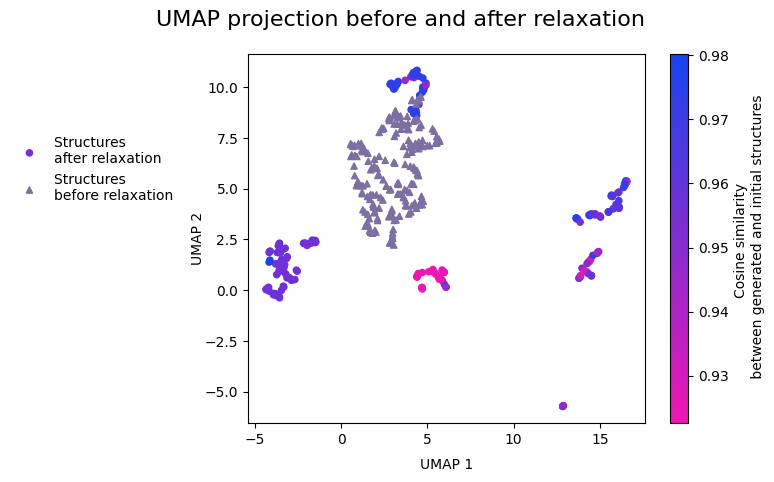

In [15]:
df_results = plot_results(database_filename=database_filename,
                          descriptor_algorithm='ALIGNN',
                          reducer_algorithm='UMAP',
                          descriptors_dimensionality=2,
                          include_enthalpy=False,
                          structures_before_relaxation=True,
                          structures_after_relaxation=True,
                          poscar_init_path='POSCAR_init' # default path
                          )

You can also analyze the <code>df_results</code> dataframe, which contains information in the following format:<p>
<code>ID</code> – ID of the structure  
<code>x</code>, <code>y</code> or <code>x</code>, <code>y</code>, <code>z</code> – coordinates, calculated using reducer  
<code>Energy</code> and <code>Volume</code> of the structure  
<code>SG</code> – space group of the structure
<code>SG_symbol</code> – international symbol of space group  
<code>Cosine_similarity</code> – similarity between initial atoms in relaxed structures vs POSCAR_init  
(насколько сильно итоговая структура похожа на исходную структуру)

### Get top structures from clusters

In [18]:
df_top_structures = find_different_optimal_structures(
    database_filename=database_filename,
    descriptor_algorithm='ALIGNN',
    k=5
)

In [17]:
df_top_structures

,ID,cluster,epoch,CalcFold,generated_structure_energy,generated_structure_volume,generated_structure_SG,generated_structure_symbol,generated_structure,relaxed_structure_energy,relaxed_structure_volume,relaxed_structure_SG,relaxed_structure_symbol,relaxed_structure,warnings
0,ID-188,2,0,188,170.587345,42.831576,1,P1,"(Atom('U', [0.0, 0.0, 0.0], index=0), Atom('U'...",-105.523473,40.476924,225,Fm-3m,"(Atom('U', [0.11906233338073964, 0.19464285851...",NaN
1,ID-192,2,0,192,23.568044,42.831576,1,P1,"(Atom('U', [0.0, 0.0, 0.0], index=0), Atom('U'...",-105.522305,40.474159,225,Fm-3m,"(Atom('U', [0.09119303135918323, 0.16890022963...",NaN
2,ID-78,2,0,78,-33.818169,42.831576,1,P1,"(Atom('U', [0.0, 0.0, 0.0], index=0), Atom('U'...",-105.522108,40.472773,225,Fm-3m,"(Atom('U', [0.1408343137478955, 0.162182303389...",NaN
3,ID-108,2,0,108,83.152307,42.831576,1,P1,"(Atom('U', [0.0, 0.0, 0.0], index=0), Atom('U'...",-105.521869,40.478128,225,Fm-3m,"(Atom('U', [4.889264056475829, 0.1493161273421...",NaN
4,ID-158,2,0,158,118.932679,42.831576,1,P1,"(Atom('U', [0.0, 0.0, 0.0], index=0), Atom('U'...",-105.521758,40.475894,225,Fm-3m,"(Atom('U', [0.10830207099021612, 0.11892135297...",NaN
5,ID-180,0,0,180,-33.403999,42.831576,1,P1,"(Atom('U', [0.0, 0.0, 0.0], index=0), Atom('U'...",-104.181397,40.608642,8,Cm,"(Atom('U', [0.07538491561020243, 0.08205748861...",NaN
6,ID-172,0,0,172,186.590871,42.831576,1,P1,"(Atom('U', [0.0, 0.0, 0.0], index=0), Atom('U'...",-104.181144,40.602743,8,Cm,"(Atom('U', [0.1887491699559786, 0.128737725158...",NaN
7,ID-93,0,0,93,-13.843260,42.831576,1,P1,"(Atom('U', [0.0, 0.0, 0.0], index=0), Atom('U'...",-104.180922,40.601173,8,Cm,"(Atom('U', [4.878435901558917, 0.1035107143044...",NaN
8,ID-153,0,0,153,87.492726,42.831576,1,P1,"(Atom('U', [0.0, 0.0, 0.0], index=0), Atom('U'...",-104.180503,40.602412,8,Cm,"(Atom('U', [4.99403334174281, 0.12150469678942...",NaN
9,ID-163,0,0,163,46.548865,42.831576,1,P1,"(Atom('U', [0.0, 0.0, 0.0], index=0), Atom('U'...",-104.180336,40.600739,8,Cm,"(Atom('U', [0.18950784131470413, 4.89224161019...",NaN
